<a href="https://colab.research.google.com/github/Samonto-Karmaker/CSE423-Project/blob/main/CSE423_Final_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q lucid>=0.2.3

In [ ]:
import numpy as np

import ctypes.util
from lucid.misc.gl.glcontext import create_opengl_context

# Now it's safe to import OpenGL and EGL functions
import OpenGL.GL as gl
from OpenGL.GLU import *

# create_opengl_context() creates GL context that is attached to an
# offscreen surface of specified size. Note that rendering to buffers
# of different size and format is still possible with OpenGL Framebuffers.
#
# Users are expected to directly use EGL calls in case more advanced
# context management is required.
WIDTH, HEIGHT = 800,600
create_opengl_context((WIDTH, HEIGHT))
    
# OpenGL context is available here.

print(gl.glGetString(gl.GL_VERSION))
print(gl.glGetString(gl.GL_VENDOR)) 
#print(gl.glGetString(gl.GL_EXTENSIONS))

b'4.6.0 NVIDIA 460.32.03'
b'NVIDIA Corporation'


Project Code Starts:

In [ ]:
#To draw each pixel
def addPixal(a, b):
  gl.glBegin(gl.GL_POINTS)
  gl.glVertex2f(a / (WIDTH / 2), b / (HEIGHT / 2))
  gl.glEnd()

In [ ]:
#Background
import random
def stars(starCount = 50):
  j = starCount
  for i in range(starCount):
    n = j % (i + 1)
    if n == 4 or n == 6 or n == 8:
      gl.glPointSize(n)
    else:
      gl.glPointSize((n % 3) + 2)
    gl.glColor3f(i / j, 0.5, 0.25)
    x = random.randint(-400, 400)
    y = random.randint(-300, 300)
    addPixal(x, y)
    j -= 1

Line Drawing

In [ ]:
# Zone Identifier
def zoneId(s, f):
  x = (f[0] - s[0])
  y = (f[1] - s[1])
  if x >= 0 and y >= 0:
    if x > y:
      return 0
    else:
      return 1
  elif x < 0 and y >= 0:
    if abs(x) > y:
      return 3
    else:
      return 2
  elif x < 0 and y < 0:
    if abs(x) > abs(y):
      return 4
    else:
      return 5
  elif x >= 0 and y < 0:
    if x > abs(y):
      return 7
    else:
      return 6
    

In [ ]:
# Zone 0 => the given zone
def zoneConvertFromZero(x, y, zone):

  if zone == 1 or zone == 2 or zone == 5 or zone == 6:
    x, y = y, x
  
  if zone == 2 or zone == 3 or zone == 4 or zone == 5:
    x = -x
  
  if zone == 4 or zone == 5 or zone == 6 or zone == 7:
    y = -y

  return [x, y]

In [ ]:
# Zone 0 <= the given zone
def zoneConvertToZero(x, y, zone):

  if zone == 2 or zone == 3 or zone == 4 or zone == 5:
    x = -x
  
  if zone == 4 or zone == 5 or zone == 6 or zone == 7:
    y = -y

  if zone == 1 or zone == 2 or zone == 5 or zone == 6:
    x, y = y, x

  return [x, y]

In [ ]:
# Mid Point Line Algorithm
def midPointLineAlgo(s, f):

  z = zoneId(s, f)
  if z != 0:
    s = zoneConvertToZero(s[0], s[1], z)
    f = zoneConvertToZero(f[0], f[1], z)
  
  dx = f[0] - s[0]
  dy = f[1] - s[1]
  d = 2 * dy - dx
  dE = 2 * dy
  dNE = 2 * (dy - dx)

  y = s[1]
  x = s[0]
  while x <= f[0]:

    if z != 0:
      op = zoneConvertFromZero(x, y, z)
      addPixal(op[0], op[1])
    else:
      addPixal(x, y)

    if d > 0:
      d += dNE
      y += 1
    else:
      d += dE

    x += 1

In [ ]:
# To rotate the axis
import math
def rotation(x, y, thita):
  a = math.cos(math.radians(thita))
  b = math.sin(math.radians(thita))

  r = np.array([[a, -b, 0],
             [b, a, 0],
             [0, 0, 1]])
  p = np.array([[x],
                 [y],
                 [1]])
  rp = np.matmul(r, p)

  return [rp[0][0], rp[1][0]]


Circle Drawing

In [ ]:
# Zone 1 => the given zone
def zoneConvertFromOne(x, y, zone):

  if zone == 1:
    return [x, y]

  if zone == 0 or zone == 3 or zone == 4 or zone == 7:
    x, y = y, x
  
  if zone == 2 or zone == 3 or zone == 4 or zone == 5:
    x = -x
  
  if zone == 4 or zone == 5 or zone == 6 or zone == 7:
    y = -y

  return [x, y]

In [ ]:
#Translation for circle
def translater(x, y, c):
  s = np.array([[1, 0, c[0]],
             [0, 1, c[1]],
             [0, 0, 1]])
  p = np.array([[x],
                 [y],
                 [1]])
  tp = np.matmul(s, p)

  return tp[0][0], tp[1][0]

In [ ]:
#To draw 8 points simultanously
def draw(x, y, c):
  for i in range(8):
    p = zoneConvertFromOne(x, y, i)
    ps = translater(p[0], p[1], c)
    addPixal(ps[0], ps[1])

In [ ]:
# Scaling
def scaling(x, y, sc):
  s = np.array([[sc, 0, 0],
             [0, sc, 0],
             [0, 0, 1]])
  p = np.array([[x],
                 [y],
                 [1]])
  sp = np.matmul(s, p)

  return sp[0][0], sp[1][0]
  

In [ ]:
# Mid Point Circle Algorithm
def midPointCircleAlgo(r, c, isEarth, sc):
  t = 0
  if not isEarth:
    t, r = scaling(t, r, 10)
  if isEarth:
    t, r = scaling(t, r, sc)

  x = 0
  y = r
  d = 1 - r
  dE = 3
  dSE = (-2 * r) + 5

  draw(x, y, c)

  while y >= x:
    if d <= 0:
      d += dE
      dSE += 2
    else:
      d += dSE
      dSE += 4
      y -= 1
    dE += 2
    x += 1
    draw(x, y, c)

Draw the solar system

In [ ]:
def draw_path(p1, p2, thita):
  gl.glColor3f(1, 0, 1)
  p1 = rotation(p1[0], p1[1], thita)
  p2 = rotation(p2[0], p2[1], thita)
  midPointLineAlgo(p1, p2)

In [ ]:
def draw_axis(p1, p2, c):
  gl.glColor3f(1, 1, 1)
  p1 = scaling(p1[0], p1[1], 0.75)
  p2 = scaling(p2[0], p2[1], 0.75)

  p1 = rotation(p1[0], p1[1], 90)
  p2 = rotation(p2[0], p2[1], 90)
  
  p1 = translater(p1[0], p1[1], c)
  p2 = translater(p2[0], p2[1], c)

  midPointLineAlgo(p1, p2)

In [ ]:
#Function to color the Sun
def color_sun(r):
  i=0
  while i<=r:
    midPointCircleAlgo(i, [0, 0], False, 1)
    i+=0.1
    

In [ ]:
#Function to color the Earth
def earth_bightness(day):
  if day==90:
    return  gl.glColor3f(0,0, 0)

  elif 57<day<90 :
    a= 0.5- (day-57)/68
    b= 1- (2*(day-57))/68
    c= 1- (2*(day-57))/68

    return gl.glColor3f(a,b, c)

  elif 90<day<125:
    a= (day-90)/68
    b= (2*(day-90))/68
    c= (2*(day-90))/68

    return gl.glColor3f(a,b, c)

  else:
    return gl.glColor3f(.5, 1, 1)

In [ ]:
def draw_sun(r):
  gl.glColor3f(1, 1, 0)
  midPointCircleAlgo(r, [0, 0], False, 1)
  color_sun(r) #colored the sun

In [ ]:
def positionOfEarth(day, path_len):
  #center of the earth
  c = [-(path_len // 2), 0]
  offset = path_len // (364 / 2)

  if day < (364 / 2):
    for i in range(day):
      c[0] += offset
  else:
    c = [(path_len // 2), 0]
    for i in range(day - (364 // 2)):
      c[0] -= offset
  
  return c


In [ ]:
def scaleOfEarth(position, path_len):
  sc = 5
  distance = abs(int(position[0]))
  offset = ((5 - 1) / (path_len / 2))
  for i in range(distance):
    sc -= offset
  return sc


In [ ]:
def draw_earth(day, path_len, earth_r, thita):
  earth_bightness(day)
  c = positionOfEarth(day, path_len)
  sc = scaleOfEarth(c, path_len)
  c = rotation(c[0], c[1], thita)
  i=0
  while i<=earth_r:
    midPointCircleAlgo(i, c, True, sc)
    i+=0.1

Date Calculation

In [ ]:
from datetime import datetime
def date2day(d):
  given_date = datetime.strptime(d, "%b %d %Y")
  ref_date = datetime.strptime("Jan 01 2022", "%b %d %Y")
  day = given_date - ref_date
  print(day.days)
  return day.days

Putting it all together

In [ ]:
def path_len_cal(p1, p2):
  return int(((p1[0] - p2[0]) ** 2) + ((p1[1] - p2[1]) ** 2)) ** (1 / 2)

In [ ]:
def draw_solar_system(date, p1, p2, r = 10, thita = 0):
  day = date2day(date)
  path_len = path_len_cal(p1, p2)
  c = positionOfEarth(day, path_len)
  if day < (365 / 2):
    draw_sun(r)
    draw_path(p1, p2, thita)
    draw_axis(p1, p2, c)
    draw_earth(day, path_len, r, thita)
  elif day >= (365 / 2):
    draw_path(p1, p2, thita)
    draw_axis(p1, p2, c)
    draw_earth(day, path_len, r, thita)
    draw_sun(r)

In [ ]:
# Let's render something!
gl.glClear(gl.GL_COLOR_BUFFER_BIT)

stars()

gl.glColor3f(1, 1, 1)

date = input("Enter date(format:Dec 10): ")
date = date + " 2022"
#thita = input("Enter angle: ")
r = input("Enter the Earth's radius: ")

draw_solar_system(date, [-364, 0], [364, 0], int(r))

Enter date(format:Dec 10): Jul 26
Enter the Earth's radius: 10
206


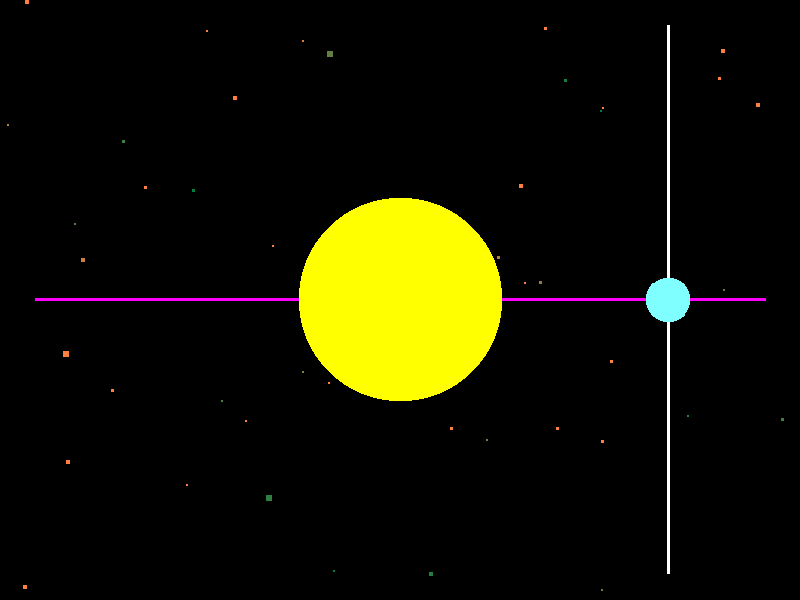

In [ ]:
from IPython.display import display
from PIL import Image

img_buf = gl.glReadPixelsub(0, 0, WIDTH, HEIGHT, gl.GL_RGB, gl.GL_UNSIGNED_BYTE)
img = np.frombuffer(img_buf,np.uint8).reshape(HEIGHT, WIDTH, 3)[::-1]
display(Image.fromarray(img,'RGB'))